## Introdução

<br>

Temos hoje no mercado um boom de aplicações envolvendo o uso de algoritmos de Machine Learning, sendo utilizados nos mais diversos setores da indústria, para realizarem uma série de tarefas como classificação, modelos de regressão, previsões, segmentações, etc. Isso no entanto, levou a uma percepção errônea sobre o papel desses algoritmos em projetos analíticos. Enquanto que a escolha do algoritmo seja fundamental, devendo estar de acordo com o problema que será atacado no projeto, os prazos de implementação e a infraestrutura disponível para a produção do modelo, o desempenho do algoritmo (por mais robusto que seja - ex. Deep Learning) é totalmente dependente da qualidade dos dados com que os algoritmos de treino são alimentados.

Os algoritmos de ML aprendem a realizar tarefas específicas após serem alimentados com exemplos que representam um cenário, um sistema específico, bem como o resultado que queremos prever naquele sistema (especialmente no contexto de aprendizagem supervisionada). Intuitivamente, podemos imaginar que, quanto melhor aquele cenário for representado, mais próximo da realidade, melhor será a compreesão do algoritmo sobre as relações entre as variáveis desse sistema, e assim, melhor será seu desempenho na tarefa desejada. 

Os cenários, no contexto de ciência de dados, são representados por conjuntos de dados que depois de preparados, assumem estruturas geralmente matriciais. De fato, praticamente todo algoritmo de ML implementado hoje através de frameworks processa os inputs em sua forma matricial, e realizam cálculos estatísticos (especialmente modelos paramétricos) em conjunto com aplicações de álgebra linear nesses dados para chegarem ao modelo final. 

Dentre as etapas de preparação de dados, um ponto de atenção sempre será a __dimensionalidade__ dos vetores que representam cada exemplo de um sistema. A dimensionalidade do nosso conjunto de dados está geralmente relacionada a dois fatores: a riqueza de informações que puderam ser coletadas sobre o sistema, podendo assim representá-lo com mais variáveis, e além disso, o __domínio__ do nosso conjunto de dados. 

Um bom exemplo de domínio de dados são emails, documentos ou artigos em aplicações de Processamento de Linguágem Natural. Esse cenário pode ser descrito em uma matriz chamada de __Bag of Words__:

A matriz $X$ representa um bag of words contendo $\normalsize m$ documentos $D$ sendo representados por $\normalsize n$ termos $T$ enquanto que $w$ representa a frequência do termo $T$ no documento $D$.
<br>
<img src="https://latex.codecogs.com/gif.latex?%5Clarge%20X%20%3D%20%5Cbegin%7Bbmatrix%7D%20%26%20T_1%20%26%20T_2%20%26%20%5Ccdots%20%26%20T_n%5C%5C%20D_1%20%26%20w_1_1%20%26%20w_1_2%20%26%20%5Ccdots%20%26%20w_1_n%5C%5C%20D_2%20%26%20w_2_1%20%26%20w_2_2%20%26%20%5Ccdots%20%26%20w_2_n%5C%5C%20%5Cvdots%20%26%20%5Cvdots%20%26%20%5Cvdots%20%26%20%5Cddots%20%26%20%5Cvdots%5C%5C%20D_m%20%26%20w_m_1%20%26%20w_m_2%20%26%20%5Ccdots%20%26%20w_m_n%20%5Cend%7Bbmatrix%7D">
<br>
Texto é um perfeito exemplo de domínio de dados que são representados por matrizes de __alta dimensionalidade__, uma vez que precisamos compor um __vocabulário__ de termos (únicos ou compostos) do conjunto de documentos disponíveis, para depois representar cada documento através da frequência desses termos. Isso gera inclusive o que chamamos de __vetores esparços__, onde a maioria dos valores são iguais à zero. Supondo que em no nosso exemplo acima, nosso vocabulário final contive-se um total de 50.000 termos (o que, acredite, poderia ser bem maior), significaria que cada documento seria representado como um vetor de 50.000 dimensões, $\normalsize R^{50.000}$. Isso representa um nível alto de complexidade que precisamos trabalhar, bem diferente de exemplos de datasets didáticos que vemos quando começamos a aprender sobre Data Science. 

A alta dimensionalidade tem implicações que merecem atençao quando estamos modelando dados. Uma delas, comumente referida na literatura como a _maldição da dimensionalidade_ (curse of dimensionality) é o problema da extração de medidas e padrões matemáticos em espaços vetoriais de alta dimensao. Um exemplo prático disso é o comportamento da distância euclidiana em diferentes espaços vetoriais. Ela é calculada através da fórmula abaixo:
<br>
<img src="https://latex.codecogs.com/gif.latex?%5Clarge%20d_a_b%20%3D%20%5Csqrt%7B%5Csum_%7Bi%3D1%7D%5E%7Bn%7D%20%28x_a_i%20-%20x_b_i%29%5E%7B2%7D%7D">
<br>
Onde $a$ e $b$ são dois vetores de $R^{n}$, e $x$ representa os respectivos valores de $a$ e $b$

A distância euclidiana é utilizada como medida de distância padrão para a maioria dos algoritmos de clusterização disponíveis, como K-means, DBSCAN, e o próprio KNN (embora esse seja supervisionado, utilizando a distância entre vetores para classificar um novo vetor). Ela é computacionalmente eficiente e funciona muito bem para baixos espaços dimensionais. Porém, conforme aumentamos o número de dimensões, as distâncias entre os vetores começam a se perder, e com elas, a informação contida:

<img src="https://miro.medium.com/max/1760/1*J3nATcT6JqXybtYqoTiTdg.png", width='780px'>

Enquanto que redes neurais artificiais, especialmente as profundas (chamadas de __deep learning__) tem se mostrado algoritmos extremamente robustos para encontrar padrões e modelar dados em altos espaços dimensionais, o custo computacional e as dificuldades de implementação desses modelos os tornam inviáveis em uma série de aplicações e contextos. Já para os algoritmos tradicionais de ML, a dificuldade de modelar em alta dimensionalidade e o custo compotacional envolvendo computações em matrizes demasiadamente grandes continua se fazendo presente, especialmente em uma era de Big Data e da ingestão de quantidades massivas de dados - em sua grande maioria não estruturados - como texto. 

Felizmente, existem maneiras de se abordar esse problema. A álgebra linear nos proporciona maneiras de decompor matrizes de alta dimensionalidade, e representar os dados originais em espaços dimensionais menores retendo o máximo de informação possível. Nesse Notebook, vamos abordar 3 técnicas fundamentais em se tratando de redução de dimensionalidade e como elas estão intimamente relacionadas: __Eigendecomposition__ (EVD), __Singular Value Decomposition__ (SVD) e o __Principal Component Analysis__ (PCA). Vamos também mostrar cálculos exemplificando essas técnicas e como implementá-las em python. Por fim, vamos comparar com algoritmos já implementados de pacotes importantes em data science: o PCA do __Sklearn__ e o SVD do __Numpy__.

In [82]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from plots import plot
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.DataFrame

### !!! CÉLULA ABAIXO DEVE VIRAR UM SCRIPT EXTERNO !!! LEMBRAR

### contem todas as funções necessárias para gerar as visualizações

### SCRIPT -- visualizacoes.py --

In [417]:
import warnings
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np

# Configura estilo de exibição dos gráficos
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
plt.style.use('ggplot')
np.set_printoptions(suppress=True)

def numpy_convert(array, to_vec=False):
    '''
    Argumentos:
    array: lista de valores a ser validada
    '''
    # Testa se obj é uma lista built in do python ou se é numpy.ndarray
    if isinstance(array, list):
        array = np.array(array)
    # testa de o obj é unidimensional ou bi-dimensional
    # as funções de visualização exigem arrays 2-D
    if to_vec:
        return array
    else:
        if array.ndim == 1:
            return np.array([array])
        else:
            return array

        
def number_to_string(ndarray):
    '''
    Argumentos
    ndarray: array matemático que será convertido em string
    '''
    # Arredonda os valores para 3 casas decimais
    rounded = (round(x,3) for x in ndarray)
    # testa se existem apenas valores inteiros no vetor
    if ndarray.dtype == numpy.float64:
        # constroí uma lista contendo os valores como strings já preparados para visualização
        return [
            '%.2f' % val 
            if str(val)[-2:] != '.0' 
            else '%d' % val 
            for val in rounded
        ]
    else:
        return list(map(str, rounded))

        
def display_vec(V):
    V = numpy_convert(V, to_vec=True)
    # Gera o código latex
    latex_code = '<br>$\\begin{bmatrix}%s\\end{bmatrix}$<br><br>'
    # cria a string contendo os valores da matriz
    add = '\\\\'.join(number_to_string(V))
    # Exibe a matriz
    display(Markdown(latex_code % add))


# Função para exibir vetores e matrizes em Latex Markdown
def display_matrix(M, n_rows=None):
    '''
    Argumentos da função
    M: 2-D array contendo vetor ou matriz a ser plotada com markdown
    '''
    M = numpy_convert(M)
    # Gera o código latex
    latex_code = '<br>$\\begin{bmatrix}%s\\end{bmatrix}$<br><br>'
    # cria a string contendo os valores da matriz
    M_str = (number_to_string(vec) for vec in M)
    add = '\\\\'.join('&'.join(vec) for vec in M_str)
    # Exibe a matriz
    display(Markdown(latex_code % add))


# Função para plotar vetores
def plot_vecs(V, labels=None, fontsize=14):
    '''
    Argumentos da função
    V: array de vetores, pode ser lista ou numpy array
    labels: Rótulos posicionais por vetor para o gráfico (se houverem), default é None
    !! len(labels) == len(V) !!
    fontsize: tamanha da fonte dos rótulos, padrão 14 mas pode alterar
    '''
    V = numpy_convert(V)
    # constrói o plano cartesiano e eixos X e Y
    plt.axhline(0, c='black', lw=0.5)
    plt.axvline(0, c='black', lw=0.5)
    
    # Ajusta área de plot de acordo com tamanho dos vetores
    dimensoes = (V.min() - 2, V.max() + 2)
    plt.xlim(dimensoes)
    plt.ylim(dimensoes)
    
    # bloco de código que plota vetores e labels
    
    n = len(V)
    # procedimento para plotar vetor único
    if n == 1:
        x = V[0][0]
        y = V[0][1]
        plt.quiver(0, 0, x, y, range(n), angles='xy', scale_units='xy', scale=1)
        
        # em caso de vetor único, testa que tipo de obj é labels
        if not labels:
            pass
        else:
            # função suporta label como string única
            if isinstance(labels, str):
                label = labels
            else:
                label = labels[0]
            # plota o rótulo
            plt.text(x, y, label, fontsize=fontsize)
            
    # procedimento para plotar uma matriz de vetores
    else:
        U = V.T[0]
        W = V.T[1]
        plt.quiver(0, 0, U, W, range(n), angles='xy', scale_units='xy', scale=1)
        
        # plota os rótulos dos vetores na ponta de maneira posicional
        # um rótulo para um vetor
        for vetor, label in zip(V, labels):
            #plota o rótulo
            plt.text(vetor[0], vetor[1], label, fontsize=fontsize)
    # exibe o gráfico final pronto
    plt.show()

<br>

### Transformações Lineares
<br>
Transformações lineares são funções que associam dois espaços vetorias preservando operações de adição vetorial e multiplicação por escalar. Em outras palavras, são funções que transformam um vetor em outro de forma linear: $\normalsize f : v \rightarrow u $. 

Transformações lineares são basicamente o foco de estudo da álgebra linear, uma vez que essas transformações funcionam como mapas entre espaços vetoriais, que é exatamente o que estamos interessados em abordar nesse notebook: representar um espaço vetorial em outro de menor dimensionalidade. De fato, transformações lineares são fundamentais em ciência de dados, e estão ocorrendo por trás de praticamente todos os algoritmos já implementados que utilizamos em frameworks prontos. A ideia aqui é justamente mostrar essas transformações ocorrendo de forma a abrir a caixa preta de alguns dos algoritmos mais relevantes em análise exploratória e preparação de dados 

Uma transformação linear pode ser representada como uma multiplicação de matrizes: $\normalsize f(v) = Av $ onde $\normalsize A$ é uma matriz que representa a transformação linear, sendo multiplicada pelo vetor alvo $\normalsize v$.

Vamos ver um exemplo de transformação do vetor $\normalsize v$ por uma matriz $\normalsize A$.

Utilizaremos como exemplo vetores de duas dimensões e matrizes pequenas para facilitar a visualização gráfica e compreensão dos exemplos, mas assuma que as técnicas demonstradas são comummente aplicadas a grandes matrizes e vetores.

Primeiro, vamos criar o vetor $\vec{v_1}$ e plotá-lo no plano cartesiado.

In [343]:
v_1 = np.array([2, 3])

In [347]:
display_vec(v_1)

<br>$\begin{bmatrix}2\\3\end{bmatrix}$<br><br>

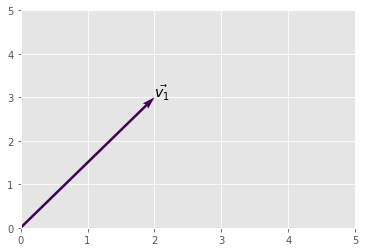

In [356]:
plot_vecs(v_1, labels="$\\vec{v_1}$")

Criamos agora uma matriz $\normalsize A$ que será a transformação linear de $\vec{v_1}$ como $\normalsize A\vec{v_1}$.
<br>
<br>
<br>
$$
\normalsize
A = \begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}
$$
<br>
Lembrando que a multiplicação entre uma matriz m x n por um vetor m x 1 resultará em um novo vetor m x 1. Generalizando a regra para multiplicações entre matrizes, a matriz resultante tem sempre o número de linhas da primeira matriz e o número de colunas da segunda matriz, ou seja, em algebra linear, a ordem dos produtos __altera__ o resultado! Isso é um dos fundamentos da álgebra linear. 

In [314]:
A = np.array([[4,3],
              [1,2]])

In [333]:
display_matrix(A)

<br>$\begin{bmatrix}4&3\\1&2\end{bmatrix}$<br><br>

Na célula abaixo, usamos o operador @ para realizar a multiplicação entre matrizes e vetores. Quando nossas matrizes e vetores são objetos array do numpy, podemos usar o método __dot()__ para realizar o __dot product__ pelo vetor ou matriz ao invés de usar o operador @.

In [322]:
Av_1 = A @ v_1

In [334]:
display_vec(Av_1)

<br>$\begin{bmatrix}17\\8\end{bmatrix}$<br><br>

Temos agora um vetor $A\vec{v_1}$ que é a transformação linear de $\vec{v_1}$. Vamos agora plotá-lo e ver como o novo vetor se compara com o vetor original

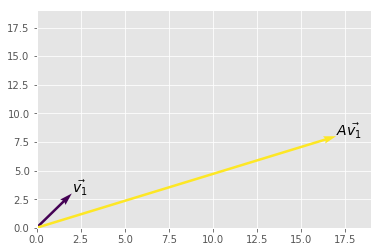

In [357]:
vecs = np.array([v_1, Av_1])
labels = ["$\\vec{v_1}$", "$A\\vec{v_1}$"]
plot_vecs(vecs, labels)

Repare que o vetor $\vec{v_1}$, quando multiplicada pela a matriz $A$, sofre uma transformação linear que muda sua direção, e sua magnetude.
<br>
<br>
(1)$$
\normalsize
A\vec{v_1} = \begin{bmatrix}4&3\\1&2\end{bmatrix} . \begin{bmatrix}2\\3\end{bmatrix}
$$
<br>
(2)$$
\normalsize
A\vec{v_1} = \begin{bmatrix}17\\8\end{bmatrix}
$$
<br>
<br>
Vamos agora ver a transformação linear de um segundo vetor $\vec{v_2} = \begin{bmatrix}3\\1\end{bmatrix}$. 
Abaixo plotamos ele no plano cartesiano

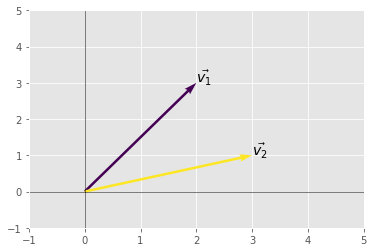

In [358]:
v_2 = np.array([3,1])
vecs = np.array([v_1, v_2])
labels = ["$\\vec{v_1}$", "$\\vec{v_2}$"]
plot_vecs(vecs, labels)

<br>
E agora, vamos aplicar a transformação $A\vec{v_2}$
<br>

In [326]:
Av_2 = A @ v_2

Acima a seguinte transformação foi efetuada:
<br>
<br>
(1)$$
\normalsize
A\vec{v_2} = \begin{bmatrix}4&3\\1&2\end{bmatrix} . \begin{bmatrix}3\\1\end{bmatrix}
$$
<br>
(2)$$
\normalsize
A\vec{v_2} = \begin{bmatrix}15\\5\end{bmatrix}
$$

Novamente, vamos plotar no plano cartesiano e ver como o vetor foi transformado

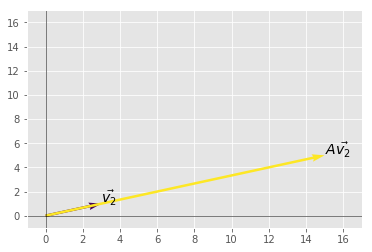

In [359]:
vecs = np.array([v_2, Av_2])
labels = ["$\\vec{v_2}$", "$A\\vec{v_2}$"]
plot_vecs(vecs, labels)

<br>
<br>
Pela plotagem acima, percebemos que a transformação linear do vetor $\vec{v_2}$ pela matriz $A$ alterou sua magnetude, mas __não alterou sua direção__. Aplicar a transformação com $A$ no vetor $\vec{v_2}$ foi equivalente à multiplicá-lo pelo escalar 5:
<br>
<br>
$$
\normalsize
\begin{bmatrix}4&3\\1&2\end{bmatrix} . \begin{bmatrix}3\\1\end{bmatrix} = 5  \begin{bmatrix}3\\1\end{bmatrix}
$$

Isso nos diz que $\vec{v_2}$ é um __autovetor__ da transformação linear de $A$, e que 5 é o __autovalor__ associado a esse autovetor. 

### Autovalores e Autovetores

De maneira simplificada, _autovetores_ de uma transformação linear são os vetores dos quais uma transformação linear aplicada a ele é equivalente a multiplicá-lo por um escalar chamado de autovalor. Essa transformação não gera uma mudança de __direção__ no vetor, apenas uma possível mudança de magnetude do vetor, magnetude essa que está associada justamente ao _autovalor_.

<img src="https://www.mathsisfun.com/algebra/images/eigen-transform.svg" width="500px">

Eles são chamados na literatura estrangeira de _eigenvectors_ e _eigenvalues_ (_eigen_ é um termo alemão que significa "auto", "próprio"). A equação que explica a relação de autovetores e autovalores, como já vimos no exemplo acima, é dada por:

$$ \Large Ax = \lambda x $$

Onde: 
-  $\normalsize A $ é uma matriz que representa a transformação linear aplicada
-  $\normalsize x$ representa o autovetor
-  $\normalsize\lambda$ representa o autovalor
 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Eigenvalue_equation.svg/375px-Eigenvalue_equation.svg.png" width='300px'>

Vamos agora representar como encontramos autovalores e seus respectivos autovetores:

Vamos usar o exemplo acima, e mostrar como chegamos a $\lambda = 5$ e $\vec{v_2} = \begin{bmatrix}3\\1\end{bmatrix}$ a partir da matriz $A$

Seja:

$$
\normalsize
A = \begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}
$$

Encontraremos primeiro os autovalores, depois os autovetores associados a esses autovalores.

Fazemos uma pequena transformação na equação para encontrar os autovalores:

(1)$$\normalsize A\vec{v} - \lambda\vec{v} = \vec{0} $$

(2)$$\normalsize (A - \lambda)\vec{v} = \vec{0} $$

(3)$$\normalsize (A - \lambda I)\vec{v} = \vec{0} $$

Repare que multiplicamos $\lambda$ por uma _matriz de identidade_ $I$ de mesma ordem que a matriz A uma vez que não podemos efetuar uma operação de subtração entre uma matriz $A$ e um escalar $\lambda$. 
Feito esse ajuste, podemos encontrar os autovalores da matriz através da __equação característica__, ou __polinômio característico__, igualando a determinante da matriz resultante da subtração à zero:

$$\normalsize \det(A - \lambda I) = 0 $$

Primeiro, vamos ver como é a matriz resultante de $\normalsize(A-\lambda I)$:

(1)$$
\normalsize
\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}
-
\lambda 
\begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}
$$

(2)$$
\normalsize
\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}
-
\begin{bmatrix}\lambda & 0\\ 0 & \lambda\end{bmatrix}
$$

(3)$$
\normalsize
\begin{bmatrix}(4 - \lambda) & 3\\ 1 & (2 - \lambda)\end{bmatrix}
$$

Agora calculamos a equação característica, igualando a determinante dessa matriz a zero. Isso nos leva à um polinômio de ordem igual a ordem da matriz, no nosso caso, uma polinômio de ordem 2:

(1)$$
\normalsize
(4 - \lambda)(2 - \lambda) - (3.1) = 0
$$

(2)$$
\normalsize
\lambda^{2} - 6\lambda + 5 = 0
$$

(3)$$\normalsize \lambda = 5 \,, \, \lambda = 1$$

Agora que encontramos os autovalores, podemos substituí-los na equação e encontrar seus respectivos autovetores através de um __sistema homogêneo__:

Para $\normalsize \lambda = 1$:

$$
\normalsize
\begin{bmatrix}(4 - 1) & 3\\ 1 & (2 - 1)\end{bmatrix}
.
\begin{bmatrix}v_1\\ v_2\end{bmatrix}
=
\begin{bmatrix}
0\\ 
0
\end{bmatrix}
$$

A representação do sistema:

$$
\normalsize
\begin{cases} 3v_1 + 3v_2 = 0&\\ v_1 + v_2 = 0& \end{cases} \therefore \,\,\,\,\, v_1 = - v_2
$$

Uma característica de sistemas lineares onde temos o mesmo número de equações e incognitas, é que o sistema possui um grau de liberdade maior do que zero, em outras palavras, permite em sua solução, variáveis lívres. No nosso caso, $\normalsize v_2$ é uma variável lívre, e o autovetor para $\normalsize \lambda = 1$ pode ser escrito como:

$$
\normalsize
\vec{V_1} = \begin{bmatrix}-v_2\\ v_2\end{bmatrix} = v_2\begin{bmatrix}-1\\ 1\end{bmatrix}
$$

Fazendo o mesmo cálculo para $\normalsize \lambda = 5$:

$$
\normalsize
\vec{V_2} = \begin{bmatrix} 3v_2\\ v_2 \end{bmatrix} = v_2 \begin{bmatrix} 3\\ 1 \end{bmatrix}
$$

Finalizando, a decomposição dessa matriz com eigendecomposition nos retorna :

$$
\normalsize 
\lambda = \begin{bmatrix} 5\\ 1 \end{bmatrix}, \vec{V} = \begin{bmatrix} 3\\ 1 \end{bmatrix} , \begin{bmatrix} -1\\ 1 \end{bmatrix}
$$

Podemos agora utilizar a mesma equação $A\vec{v} = \lambda\vec{v}$ que utilizamos para encontrar os autovelores e autovetores, agora para testar se eles são realmente autovalores e vetores. Basta substituir o autovalor e respectivo autovetor na equação e verificar se existe de fato a igualdade. 

Para $\normalsize \lambda = 5, \vec{v} = \begin{bmatrix} 3\\ 1 \end{bmatrix}$:

(1)$$
\normalsize
\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix} \begin{bmatrix} 3\\ 1 \end{bmatrix}
=
5 \begin{bmatrix} 3\\ 1 \end{bmatrix}
$$

(2)$$
\normalsize
\begin{bmatrix} 15 \\ 5 \end{bmatrix}
=
\begin{bmatrix} 15\\ 5 \end{bmatrix}
$$

Para $\normalsize \lambda = 1, \vec{v} = \begin{bmatrix} -1\\ 1 \end{bmatrix}$:

(1)$$
\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix} \begin{bmatrix} -1\\ 1 \end{bmatrix}
=
1 \begin{bmatrix} -1\\ 1 \end{bmatrix}
$$

(2)$$
\begin{bmatrix} -1 \\ 1 \end{bmatrix}
=
\begin{bmatrix} -1\\ 1 \end{bmatrix}
$$

Vamos agora ver como extraímos autovalores e autovetores no python. Se, fazendo a conta na mão, precisamos passar por algumas etapas como vimos no exemplo acima, no python, precisamos de apenas uma linha de código! O módulo __linalg__ do pacote Numpy novamente vem para nos salvar de fazer esses cálculos massantes manualmente. A função __linalg.eig__ extraí os autovalores e autovetores de uma matriz passada e retorna dois objetos: um array contendo os autovalores e uma matriz contendo os autovetores como colunas da matriz.

Vamos aplicar a função na nossa matriz $A$ e ver os resultados

In [408]:
eigvals, eigvecs = np.linalg.eig(A)

Vamos exibir agora os autovalores e autovetores encontrados com a função eig:

In [409]:
display_vec(eigvals)

<br>$\begin{bmatrix}5\\1\end{bmatrix}$<br><br>

Podemos ver que a função encontrou os mesmos autovalores que calculamos na mão. Show! Vamos agora ver os autovetores

In [410]:
display_matrix(eigvecs)

<br>$\begin{bmatrix}0.95&-0.71\\0.32&0.71\end{bmatrix}$<br><br>

Aqui percebemos que a função trouxe autovetores (ordenados por colunas) com valores diferentes dos que encontramos durante o exemplo!

Erramos no cálculo? __Não!__

Se você voltar no cálculo, veja que encontramos os vetores $\vec{V_1} = \begin{bmatrix}-v_2\\ v_2\end{bmatrix}$ e $\vec{V_2} = \begin{bmatrix} 3v_2\\ v_2 \end{bmatrix}$

A única coisa, é que para simplificar as contas e facilitar a compreensão do exemplo, assumimos a variável livre $v_2 = 1$. Dessa forma, obtivemos os vetores [3,1] e [-1,1].

O algoritmo do numpy que utilizamos encontrou os mesmos vetores, porém ele os retorna com seu comprimento igual a 1. Vetores de comprimento 1 são chamados de __vetores unitários__. Em outras palavras, ele retorna os vetores com a variável livre assumindo o valor necessário para o comprimento (ou magnetude) do vetor ser igual a 1. 

Ok, e como encontramos o valor da variável $v_2$ que satisfaz $\left |v  \right | = 1$? 

No nosso caso, basta aplicar o bom e velho teorema de pitágoras igualando a hipotenusa a 1:

<img src="https://mathbitsnotebook.com/Geometry/Transformations/vectorgraph.jpg">

Temos então que para o vetor $\vec{V_1} = \begin{bmatrix}-v_2\\ v_2\end{bmatrix}$:

(1)$$ \normalsize \left | v_1 \right | = \sqrt{(-v_2)^{2} + v_2^{2}} = 1$$ 
<br>
(2)$$ \normalsize \sqrt{2v_2^{2}} = 1$$
<br>
(3) Elevando ambos os lados ao quadrado temos 
$$ \normalsize 2v_2^{2} = 1$$
<br>
(4) Finalmente
$$ \normalsize v_2 = \frac{1}{\sqrt{2}} \approx 0.71$$
<br>
<br>
Substituindo o valor de $v_2 = 0.71$ no vetor temos que $ \vec{v_1} = \begin{bmatrix}-0.71\\ 0.71\end{bmatrix}$

Fazendo o mesmo cálculo para o vetor $\vec{v_2} = \begin{bmatrix} 3v_2\\ v_2 \end{bmatrix}$
<br>
(1)$$ \normalsize \left | v_2 \right | = \sqrt{(3v_2)^{2} + v_2^{2}} = 1$$ 
<br>
(2)$$ \normalsize \sqrt{10v_2^{2}} = 1$$
<br>
(3) 
$$ \normalsize v_2 = \frac{1}{\sqrt{10}} \approx 0.32$$
<br>
<br>
Substituindo o valor de $v_2 = 0.32$ no vetor temos que $ \vec{v_2} = \begin{bmatrix}0.95\\ 0.32\end{bmatrix}$

Vamos agora plotar os autovetores unitários com seus respectivos autovalores

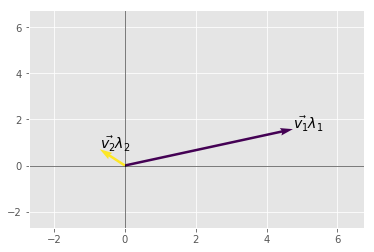

In [411]:
vecs = np.array([eigvecs.T[0]*eigvals[0], eigvecs.T[1]*eigvals[1]])
labels = ['$\\vec{v_1} \lambda_1$', '$\\vec{v_2} \lambda_2$']
plot_vecs(vecs, labels)

## Eigendecomposition (EVD)
<br>
Eigendecomposition é uma técnica que consiste em decompor uma matriz através de seus os __autovalores__ e seus respectivos __autovetores__.
<br>
Seja $A$ uma matriz quadrada, que contem n autovalores $\lambda_1$, $\lambda_2$ ... $\lambda_n$ e $V$ uma matriz contendo os n respectivos autovetores $v_1$, $v_2$ ... $v_n$ de $A$, sabemos que:

$$\normalsize AV = VD$$
<br>
Onde 
$$
D = \begin{bmatrix}\lambda_1&0&\cdots&0\\0&\lambda_2&\cdots&0\\\vdots&\vdots&\ddots&\vdots\\0&0&\cdots&\lambda_n \end{bmatrix}
$$
<br>
Portanto
<br>
$$\normalsize AV = [\,\lambda_1 v_1\,\,\lambda_2 v_2\,\cdots\,\lambda_n v_n\,]$$

Sendo assim, podemos decompor a matriz $A$ seguindo a seguinte equação:

$$\normalsize A = VDV^{-1}$$

Vamos novamente usar o exemplo da matriz $\begin{bmatrix}4 & 3\\ 1 & 2\end{bmatrix}$ e testar se a equação acima funciona:

In [412]:
V = eigvecs

In [413]:
D = np.diag(eigvals)

In [414]:
V_inv = np.linalg.inv(V)

In [415]:
print('Matriz V:')
display_matrix(V)
print('Matriz D:')
display_matrix(D)
print('Matriz V inversa:')
display_matrix(V_inv)

Matriz V:


<br>$\begin{bmatrix}0.95&-0.71\\0.32&0.71\end{bmatrix}$<br><br>

Matriz D:


<br>$\begin{bmatrix}5&0\\0&1\end{bmatrix}$<br><br>

Matriz V inversa:


<br>$\begin{bmatrix}0.79&0.79\\-0.35&1.06\end{bmatrix}$<br><br>

In [416]:
A = V @ D @ V_inv
display_matrix(A)

<br>$\begin{bmatrix}4&3\\1&2\end{bmatrix}$<br><br>

Agora que demos uma boa introdução sobre transformações lineares, autovalores e autovetores, podemos finalmente pular para os algoritmos que queremos explorar nesse notebook: Singular Value Decomposition e Principal Component Analysis. Mas, ao invés de usar matrizes simples que criamos para demonstrar alguns conceitos, iremos importar um dataset completo chamado 'customers.csv', que contem informações reais e descaracterizadas de consumo de algumas categorias de alimentos de uma rede de supermercados de Portugal por cliente. Com um dataset mais robusto podemos explorar melhor esses algoritmos e seu funcionamento.

A ideia aqui é explicar como essas técnicas funcionam, como elas podem se relacionar. Enquanto isso, implementaremos nosso próprio algoritmo utilizando apenas funções do numpy que já exploramos. E por fim, vamos comparar os resultados com as versões já implementadas desses algoritmos, para ver se estamos no caminho certo!

Vamos então importar e __preparar__ nossos dados.

In [3]:
df = pd.read_csv("customers.csv")
df.drop(['Regiao', 'Canal'], axis = 1, inplace = True)
df.head()

,Frescos,Laticinios,Doces,Congelados,Limpeza,Padaria
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


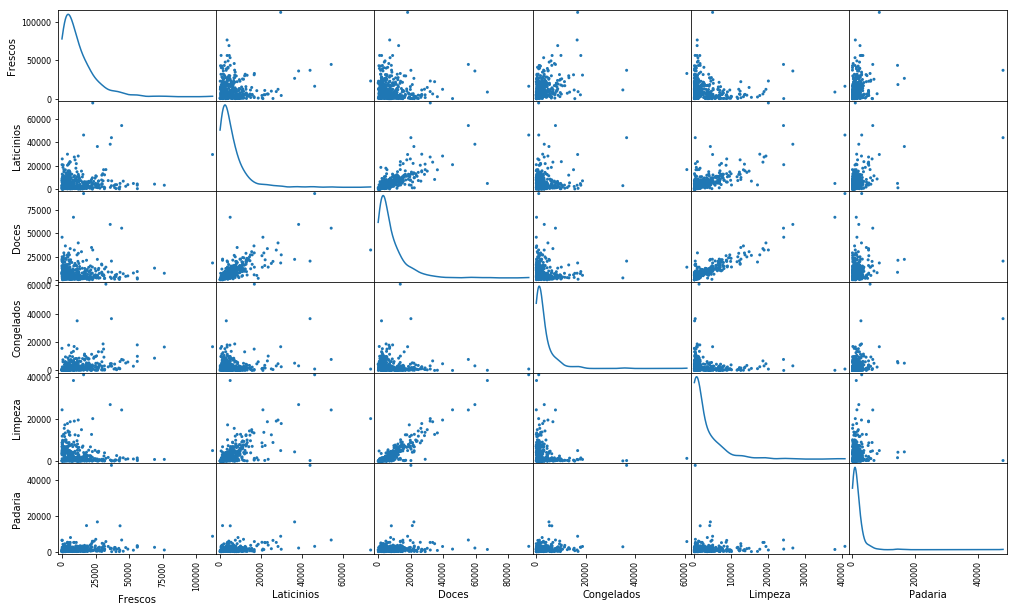

In [22]:
graph = pd.plotting.scatter_matrix(df, alpha=1, figsize=(17,10), diagonal='kde')

### Preparação dos dados

In [4]:
X = df.values
view(X).head()

,0,1,2,3,4,5
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [5]:
X = X - X.mean(axis=1)[:, np.newaxis]
view(X).head(5)

,0,1,2,3,4,5
0,6983.67,3970.67,1875.67,-5471.33,-3011.33,-4347.33
1,1512.67,4265.67,4023.67,-3782.33,-2251.33,-3768.33
2,251.33,2706.33,1582.33,-3696.67,-2585.67,1742.33
3,8701.50,-3367.50,-342.50,1840.50,-4056.50,-2775.50
4,14931.67,-2273.33,-485.33,-3768.33,-5906.33,-2498.33


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
view(X).head()

,0,1,2,3,4,5
0,0.05,0.77,-0.08,-0.59,-0.09,-0.09
1,-0.46,0.83,0.23,-0.26,0.10,0.06
2,-0.58,0.51,-0.12,-0.24,0.02,1.49
3,0.21,-0.75,-0.40,0.84,-0.36,0.32
4,0.79,-0.52,-0.42,-0.25,-0.83,0.39


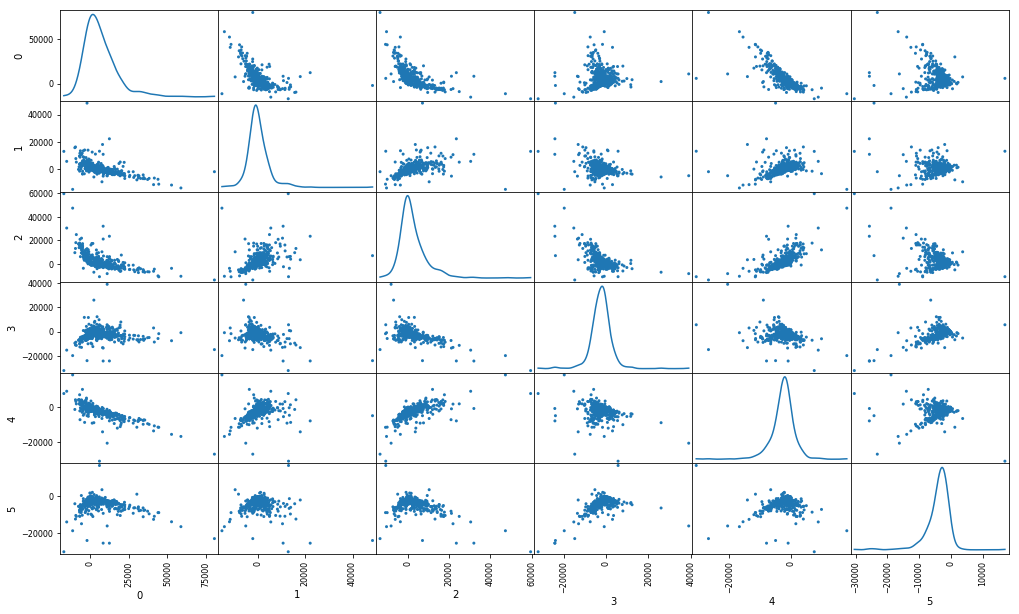

In [25]:
graph = pd.plotting.scatter_matrix(view(X), alpha=1, figsize=(17,10), diagonal='kde')

## Singular Value Decomposition (SVD)

A próxima técnica de decomposição que vamos ver é chamada __Singular Value Decomposition__, ou __SVD__. Essa técnica, consiste em decompor uma matriz - quadrada ou não - em três outras matrizes resultantes e encontrar os __valores singulares__ da matriz. Se você leu o notebook até aqui, então entender como essa técnica sw fatoração de matrizes funciona será simples. Isso porque a decomposição é feita justamente através de autovalores e autovetores

$$
\Large
A = USV^{T} 
$$

Onde:
- $A$ é a matriz alvo $m_xn$ 
- $U$ é uma matriz $m_xm$ contendo os autovetores da matriz quadrada $AA^{T}$
- $V$ é uma matriz $n_xn$ contendo os autovetores da matriz quadrada $A^{T}A$
- $S$ é uma matriz diagonal $m_xn$ contendo os valores singulares da matriz, os mesmos para ambos $

Os valores singulares que temos na matriz $S$ são nada mais do que a __raiz dos autovalores__ das matrizes $A^{T}A$ e $AA^{T}$, que possuem autovalores iguais.

Visualmente, podemos interpretar o SVD de uma matriz como:

<img src="https://www.researchgate.net/profile/Jila_Ayubi/publication/271076899/figure/fig1/AS:614261244051470@1523462701842/Singular-value-decomposition-of-A-a-full-rank-r-b-rank-k-approximation.png", width='500px'>

## Principal Component Analysis (PCA)

A Análise de Componente Principal (PCA - <em>Principal Component Analysis</em>) é um algoritmo de redução de dimensionalidade vastamente utilizado no mercado e na academia em projetos de Data Science. A premissa principal desse algoritmo é encontrar vetores chamados de componentes principais ortogonais, que explicam a maior parte da informação (leia-se __variância__) contida nos dados. Esses componentes principais são então usados como base para se projetar os dados originais em espaços dimensionais menores. Essa aplicação é especialmente útil para reduzir o custo computacional de outros algoritmos (especialmente no campo de Machine Learning) e também para facilitar a visualização de padrões e tendências nos dados em atividades de data discovery e análise exploratória. 

<img src="https://hackernoon.com/hn-images/1*WRKdN-NYF0mMumhfOXVa2Q.png", width='550px'>

Os componentes principais são vetores que se comportam como regressões, onde o modelo é ajustado dados de maneira a reduzir o erro quadrático entre a previsão e o valor real. A redução do erro quadrático é relacionado com a variância dos dados. Quanto menor o erro, maior a variância explicada, ou informação contida nos dados originais.

<img src="https://community.asdlib.org/imageandvideoexchangeforum/files/2013/07/Figure5.10.jpg", width='400px'>


O algoritmo do PCA encontra os componentes principais realizando a __eigendecomposition__ da matriz de covariância das variáveis do dataset original. O resultado dessa decomposição são os __autovetores__ e __autovalores__ (também chamados de _eigenvectors_ e _eigenvalues_) da matriz de covariância, representando a direção e intensidade (ou nesse caso, energia/variância explicada) dos componentes principais

<img src="https://www.neuraldesigner.com/images/principal_components_data_x_y_PCA1_PCA2.png", width='500px'>

Uma vez extraídos os autovetores e autovalores, eles são ordenados em ordem decrescente, do primeiro principal componente (o que possui o maior __autovalor__) para o menor. Os dados originais são então projetados em um espaço dimensional reduzido (onde cada dimensão é um componente principal). A quantidade de dimensões / componentes principais utilizados para a projeção dos dados é um parâmetro do algoritmo. O ideal é encontrar o tradeoff ótimo entre o máximo de variância explicada e a menor quantidade de componentes principais necessários para representar essa variância.

### Implementação do PCA com EVD

Agora que exemplificamos o que são e como são computados os eigenvalues e eigenvectors (componentes principais no PCA), vamos ver como eles são utilizados dentro do algoritmo.

Antes de tudo, é importante __normalizar__ os dados para a aplicação do PCA, uma vez que esse algoritmo é extremamente sensível a variáveis de grandezas diferentes, o que compromete diretamente a decomposição. Podemos aplicar o cálculo do __z-score__ para transformar os valores originais de acordo o distanciamento deles em relação a média da variável, distância essa medida em __desvios padrão__:

$$\normalsize x_z = \frac{x - \mu_x }{\sigma }$$

Dada uma matrix de features $\normalsize X$, de dimensões $\normalsize m_xn$, é computada a matriz de covariância $\normalsize n_xn$ de $\normalsize X$. Podemos encontrar essa matriz com a fórmula abaixo:

$$\normalsize C = \frac{1}{(n - 1)}X^TX$$

É realizada então a eigendecomposition dessa matriz $\normalsize C$ de forma que:

$$\normalsize V^{-1}CV = D$$

Onde:
- $V$ é a matriz de autovetores de $C$
- $C$ é a matriz de covariância
- $V^{-1}$ é a matriz inversa de $V$
- $D$ é a matriz diagonal de autovalores

Agora, a matriz de autovalores é reordenada de maneira decrescente, onde o primeiro valor de $\normalsize \lambda$

Selecionamos então os $k$ componentes principais que queremos utilizar para projetar os dados originais.

$$\normalsize W = V_k$$ 

Onde $W$ possui dimensões $n_xk$

Finalmente, para projetar os dados originais na base dos $k$ componentes principais, temos:

$$\normalsize X_k = XW$$

### Implementação do PCA utilizando SVD

Seja $X$ uma matriz m x n que queremos decompor e projetar em um espaço dimensional reduzido.

Fazendo a decomposição de $X$ com SVD, geramos as três matrizes resultantes:
<br>
$$\normalsize X = USV^{T}$$


Sabemos também que a matriz resultante $V$ representa os autovetores de $X^{T}X$, sendo assim:


(1)$$\normalsize X^{T}X = (USV^{T})^{T}(USV^{T})$$

(2)$$\normalsize X^{T}X = VSU^{T}USV^{T}$$

(3)$$\normalsize X^{T}X = VS^{2}V^{T}$$

Portanto, a matriz de covariância de $X$ pode ser representada como:

(1)$$\normalsize C = \frac{1}{(n - 1)}X^TX$$ 

(2)$$\normalsize C = \frac{1}{(n - 1)}VS^{2}V^{T}$$

(3)$$\normalsize C = V\frac{S^{2}}{(n - 1)}V^{T}$$

Percebemos assim que os autovetores da matriz de covariância que queremos encontrar, são os vetores da direita ($V$) decompostos de $X$ com o SVD.

Já para os autovalores, recordem que na decomposição por SVD, os valores singulares representam a __raiz__ dos autovalores: $\sigma_i = \sqrt{\lambda_i}$

Eis que aqui, temos nosso autovalor:

$$\normalsize \lambda_i = \frac{S_i^{2}}{(n-1)}$$

Sendo assim, projetamos $X_k$ (considerando aqui $V$ inteiro ao invés de $W$):

(1)$$\normalsize X_k = XV$$

(2)$$\normalsize X_k = USV^{T}V$$

Finalmente:

(3)$$\normalsize X_k = U_kS_k$$

In [418]:
u,s,v = np.linalg.svd(A)

In [424]:
v.T

array([[-0.75545395, -0.65520174],
       [-0.65520174,  0.75545395]])

### Centralização dos dados removendo a média

### Padronização dos dados

$$\LARGE x = \frac{x - \mu_x }{\sigma }$$

In [32]:
def PCA_EVD(X, n_comps):
    C = np.cov(X.T)
    D, V = np.linalg.eig(C)
    V = V[:, D.argsort()[::-1]]
    D = np.sort(D)[::-1]
    W = V[:,0:n_comps]
    return X.dot(W)

In [75]:
def PCA_SVD(X, n_comps):
    U,S,V = np.linalg.svd(X)
    S = np.diag(S)
    S_k = S[0:n_comps, 0:n_comps]
    U_k = U[:, 0:n_comps]
    return U_k.dot(S_k)

      0     1
0 -0.43 -0.38
1 -0.78  0.15
2 -0.18  1.15
3  1.13  0.42
4  1.12 -0.49


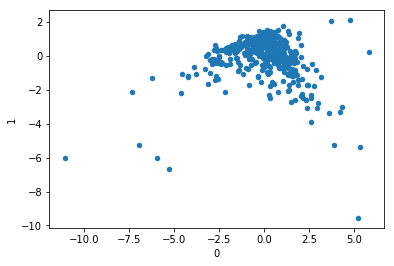

In [33]:
X_1 = PCA_EVD(X, 2)
print(view(X_1).head())
graph = view(X_1).plot.scatter(x=0, y=1)

      0     1
0  0.43  0.38
1  0.78 -0.15
2  0.18 -1.15
3 -1.13 -0.42
4 -1.12  0.49


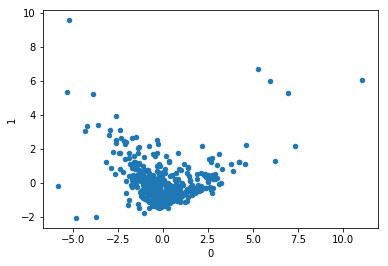

In [34]:
pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)
print(view(X_2).head())
graph = view(X_2).plot.scatter(x=0, y=1)

In [8]:
U,S,V = np.linalg.svd(X)

In [9]:
S = np.diag(S)

In [10]:
view(S[0:2, 0:2])

,0,1
0,35.76,0.00
1,0.00,27.10


In [67]:
view(U[:, 0:2]).head()

,0,1
0,0.01,0.01
1,0.02,-0.01
2,0.01,-0.04
3,-0.03,-0.02
4,-0.03,0.02


In [69]:
view(U[:, 0:2] @ S[0:2, 0:2]).head()

,0,1
0,0.43,0.38
1,0.78,-0.15
2,0.18,-1.15
3,-1.13,-0.42
4,-1.12,0.49


In [79]:
A = np.array([[3,2,2], [2,3,-2]])
AA_T = A.dot(A.T)
A_T_A = A.T.dot(A)

In [80]:
AA_T

array([[17,  8],
       [ 8, 17]])

In [89]:
S, U = np.linalg.eig(AA_T)

In [90]:
view(U)

,0,1
0,0.71,-0.71
1,0.71,0.71


In [91]:
view(S)

,0
0,25.00
1,9.00


In [81]:
A_T_A

array([[13, 12,  2],
       [12, 13, -2],
       [ 2, -2,  8]])

In [92]:
S, V = np.linalg.eig(A_T_A)

In [94]:
view(V.T)

,0,1,2
0,-0.71,-0.71,-0.00
1,-0.67,0.67,0.33
2,0.24,-0.24,0.94


In [95]:
view(S)

,0
0,25.00
1,0.00
2,9.00


In [82]:
np.linalg.eigvals(AA_T)

array([25.,  9.])

In [84]:
view(np.linalg.eigvals(A_T_A))

,0
0,25.00
1,0.00
2,9.00


In [98]:
4/(math.sqrt(18))

0.9428090415820635